# 서울시 구별 CCTV 현황 분석

In [94]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [95]:
cctv_seoul = pd.read_csv('./data/서울시 자치구 년도별 CCTV설치현황.csv', encoding='utf-8')
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546,765,577,448
1,강 동 구,"1,879",303,387.0,134.0,59,144,194,273,385
2,강 북 구,"1,265",243,88.0,141.0,74,145,254,1,319
3,강 서 구,"1,617",219,155.0,118.0,230,187,190,264,254
4,관 악 구,"3,985",430,56.0,419.0,487,609,619,694,671


In [96]:
tmp = pd.read_csv('./data/서울시 인구현황(2020 3분기).tsv', sep='\t', encoding='utf-8', header=2)
tmp.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [97]:
pop_seoul = pd.DataFrame({
    '구별': tmp['자치구'].tolist(),
    '인구수': tmp['계'].tolist(),
    '한국인': tmp['계.1'].tolist(),
    '외국인': tmp['계.2'].tolist(),
    '고령자': tmp['65세이상고령자'].tolist()
})
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [98]:
cctv_seoul.columns[0]

'기관명'

In [99]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]: '구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546,765,577,448
1,강 동 구,"1,879",303,387.0,134.0,59,144,194,273,385
2,강 북 구,"1,265",243,88.0,141.0,74,145,254,1,319
3,강 서 구,"1,617",219,155.0,118.0,230,187,190,264,254
4,관 악 구,"3,985",430,56.0,419.0,487,609,619,694,671


In [100]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구별        25 non-null     object 
 1   소계        25 non-null     object 
 2   2011년 이전  23 non-null     object 
 3   2012년     23 non-null     float64
 4   2013년     23 non-null     float64
 5   2014년     25 non-null     object 
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 2.1+ KB


In [101]:
cctv_seoul.fillna('0', inplace=True)

In [102]:
# 데이터프레임 'cctv_seoul' 의 모든 데이터들의 dtype을 맞추기 위한 작업
cctv_seoul['소계'] = cctv_seoul['소계'].str.replace(',', '')
cctv_seoul['2011년 이전'] = cctv_seoul['2011년 이전'].str.replace(',', '')
cctv_seoul['2014년'] = cctv_seoul['2014년'].str.replace(',', '')
cctv_seoul = cctv_seoul.astype({
    '소계': int,
    '2011년 이전': int,
    '2012년': int,
    '2013년': int,
    '2014년': int
    })

In [103]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   구별        25 non-null     object
 1   소계        25 non-null     int32 
 2   2011년 이전  25 non-null     int32 
 3   2012년     25 non-null     int32 
 4   2013년     25 non-null     int32 
 5   2014년     25 non-null     int32 
 6   2015년     25 non-null     int64 
 7   2016년     25 non-null     int64 
 8   2017년     25 non-null     int64 
 9   2018년     25 non-null     int64 
dtypes: int32(5), int64(4), object(1)
memory usage: 1.6+ KB


In [104]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     object
 2   한국인     26 non-null     object
 3   외국인     26 non-null     object
 4   고령자     26 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [105]:
# 데이터프레임 'pop_seoul' 의 모든 데이터들의 dtype을 맞추기 위한 작업
pop_seoul['인구수'] = pop_seoul['인구수'].str.replace(',', '')
pop_seoul['한국인'] = pop_seoul['한국인'].str.replace(',', '')
pop_seoul['외국인'] = pop_seoul['외국인'].str.replace(',', '')
pop_seoul['고령자'] = pop_seoul['고령자'].str.replace(',', '')
pop_seoul = pop_seoul.astype({
    '인구수': int,
    '한국인': int,
    '외국인': int,
    '고령자': int
    })

In [106]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      26 non-null     object
 1   인구수     26 non-null     int32 
 2   한국인     26 non-null     int32 
 3   외국인     26 non-null     int32 
 4   고령자     26 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 752.0+ bytes


In [107]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


### 구별 CCTV 최근 증가율 구하기

#### 증가율을 구하기에 앞서 2015년 이전 데이터들을 하나로 합친다

In [108]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944,195,316,430,546,765,577,448
1,강 동 구,1879,303,387,134,59,144,194,273,385
2,강 북 구,1265,243,88,141,74,145,254,1,319
3,강 서 구,1617,219,155,118,230,187,190,264,254
4,관 악 구,3985,430,56,419,487,609,619,694,671


In [109]:
cctv_seoul['2015년_이전'] = cctv_seoul['2011년 이전'] + cctv_seoul['2012년'] + cctv_seoul['2013년'] + cctv_seoul['2014년'] + cctv_seoul['2015년']
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2015년_이전
0,강 남 구,5221,1944,195,316,430,546,765,577,448,3431
1,강 동 구,1879,303,387,134,59,144,194,273,385,1027
2,강 북 구,1265,243,88,141,74,145,254,1,319,691
3,강 서 구,1617,219,155,118,230,187,190,264,254,909
4,관 악 구,3985,430,56,419,487,609,619,694,671,2001


In [110]:
del cctv_seoul['2011년 이전']
del cctv_seoul['2012년']
del cctv_seoul['2013년']
del cctv_seoul['2014년']
del cctv_seoul['2015년']
cctv_seoul = cctv_seoul[['구별', '소계', '2015년_이전', '2016년', '2017년', '2018년']]
cctv_seoul.head()

,구별,소계,2015년_이전,2016년,2017년,2018년
0,강 남 구,5221,3431,765,577,448
1,강 동 구,1879,1027,194,273,385
2,강 북 구,1265,691,254,1,319
3,강 서 구,1617,909,190,264,254
4,관 악 구,3985,2001,619,694,671


#### 최근 증가율 구하기

In [111]:
cctv_seoul['최근증가율'] = (cctv_seoul['2016년'] + cctv_seoul['2017년'] + cctv_seoul['2018년']) / cctv_seoul['2015년_이전'] * 100
cctv_seoul.head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
0,강 남 구,5221,3431,765,577,448,52.171379
1,강 동 구,1879,1027,194,273,385,82.960078
2,강 북 구,1265,691,254,1,319,83.068017
3,강 서 구,1617,909,190,264,254,77.887789
4,관 악 구,3985,2001,619,694,671,99.150425


#### CCTV가 최근에 가장 많이 증가한 자치구 TOP 5

In [112]:
cctv_seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
23,중 구,1544,629,270,317,328,145.468998
19,영등포구,2495,1042,289,371,793,139.443378
15,성 동 구,2679,1251,201,933,294,114.148681
7,금 천 구,1634,769,136,199,530,112.483745
5,광 진 구,1581,746,21,468,346,111.930295


### 인구 비율 조사하기

In [113]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [114]:
# 필요하지 않은 '합계' 행 제거
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [115]:
# 결측치 여부 확인
pop_seoul.isnull().values.any()

False

In [116]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구별      25 non-null     object
 1   인구수     25 non-null     int32 
 2   한국인     25 non-null     int32 
 3   외국인     25 non-null     int32 
 4   고령자     25 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 800.0+ bytes


#### 외국인, 고령자 비율 구하기

In [117]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [118]:
# 인구수 TOP 5 자치구
pop_seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


In [119]:
# 외국인비율 TOP 5 자치구
pop_seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,405982,375630,30352,60826,7.476194,14.982438
2,중구,135321,125800,9521,24265,7.035863,17.931437
18,금천구,249641,232157,17484,39361,7.003657,15.767041
17,구로구,435751,405579,30172,69312,6.924138,15.906332
3,용산구,244953,229786,15167,39995,6.191800,16.327622


In [120]:
# 고령자비율 TOP 5 자치구
pop_seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,313550,309996,3554,62951,1.133472,20.076862
10,도봉구,329300,327248,2052,61388,0.623140,18.641968
2,중구,135321,125800,9521,24265,7.035863,17.931437
1,종로구,159842,149952,9890,28396,6.187360,17.765043
12,은평구,485842,481546,4296,84353,0.884238,17.362229


### CCTV 데이터와 인구현황 데이터 합치기

In [121]:
# 데이터프레임 'cctv_seoul' 의 '구별' 데이터의 공백 제거
tmp = []
for i in range(len(cctv_seoul)):
    x = cctv_seoul['구별'].tolist()[i].replace(' ', '')
    tmp.append(x)

cctv_seoul['구별'] = tmp

In [122]:
cctv_seoul.head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율
0,강남구,5221,3431,765,577,448,52.171379
1,강동구,1879,1027,194,273,385,82.960078
2,강북구,1265,691,254,1,319,83.068017
3,강서구,1617,909,190,264,254,77.887789
4,관악구,3985,2001,619,694,671,99.150425


In [123]:
df = pd.merge(cctv_seoul, pop_seoul, on='구별')
df.head()

,구별,소계,2015년_이전,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,3431,765,577,448,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,1027,194,273,385,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,691,254,1,319,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,909,190,264,254,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,2001,619,694,671,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [124]:
# 필요치 않은 행 제거, 컬럼명 재설정
del df['2015년_이전']
del df['2016년']
del df['2017년']
del df['2018년']
df.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [125]:
df.rename(columns={df.columns[1]: 'cctv소계', df.columns[2]: 'cctv최근증가율'}, inplace=True)
df.head()

,구별,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
1,강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
2,강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
3,강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
4,관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [126]:
# '구별' 을 index로 설정
df.set_index('구별', inplace=True)
df.head()

,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764


In [127]:
df.to_csv('../input/Seoul/cctv_result.csv', sep=',', encoding='utf8')

### 데이터 시각화

In [128]:
title_font = {
    'size': 18,
    'weight': 'bold',
    'color': 'blue'}
label_font = {
    'size': 13,
    'weight': 'bold'}

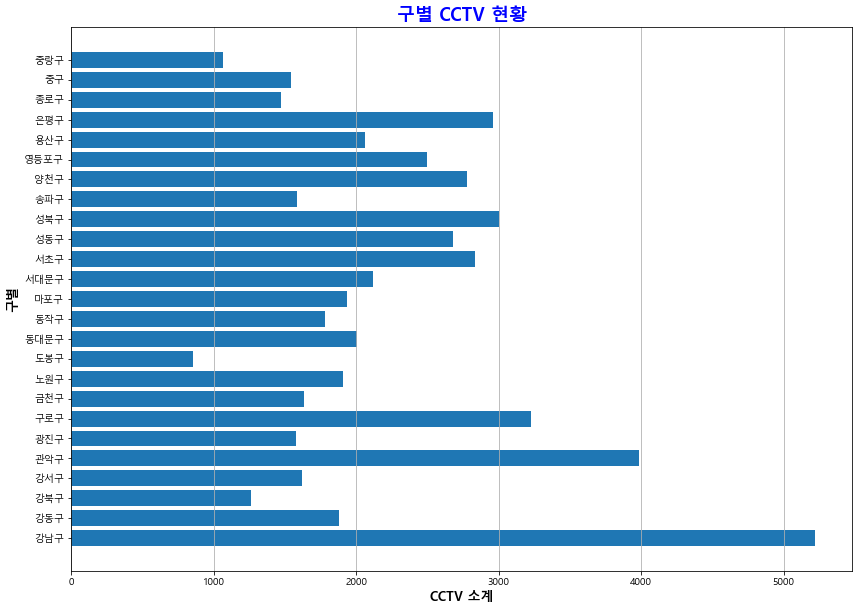

In [129]:
plt.figure(figsize=(14, 10))
plt.barh(df.index, df['cctv소계'])
plt.grid(axis='x')
plt.xlabel('CCTV 소계', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 CCTV 현황', fontdict=title_font)
plt.show()

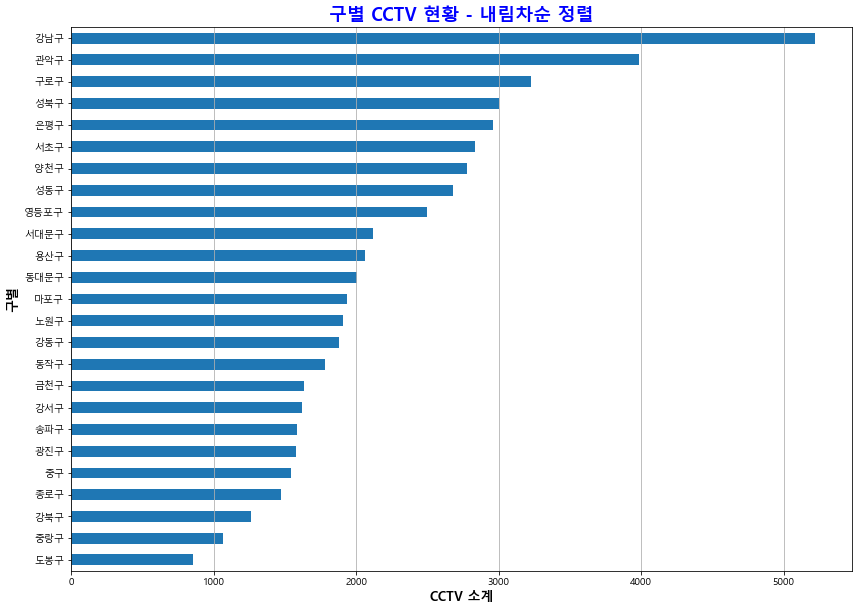

In [130]:
plt.figure(figsize=(14, 10))
df['cctv소계'].sort_values().plot(kind='barh')
plt.grid(axis='x')
plt.xlabel('CCTV 소계', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 CCTV 현황 - 내림차순 정렬', fontdict=title_font)
plt.show()

In [131]:
df['cctv비율'] = df['cctv소계'] / df['인구수'] * 100
df.head()

,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456


In [132]:
df.sort_values(by='cctv비율', ascending=False).head(5)

,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율
구별,,,,,,,,,
중구,1544,145.468998,135321,125800,9521,24265,7.035863,17.931437,1.140991
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593
종로구,1471,56.323061,159842,149952,9890,28396,6.187360,17.765043,0.920284
성동구,2679,114.148681,302695,295591,7104,45372,2.346917,14.989346,0.885049
용산구,2063,12.058664,244953,229786,15167,39995,6.191800,16.327622,0.842202


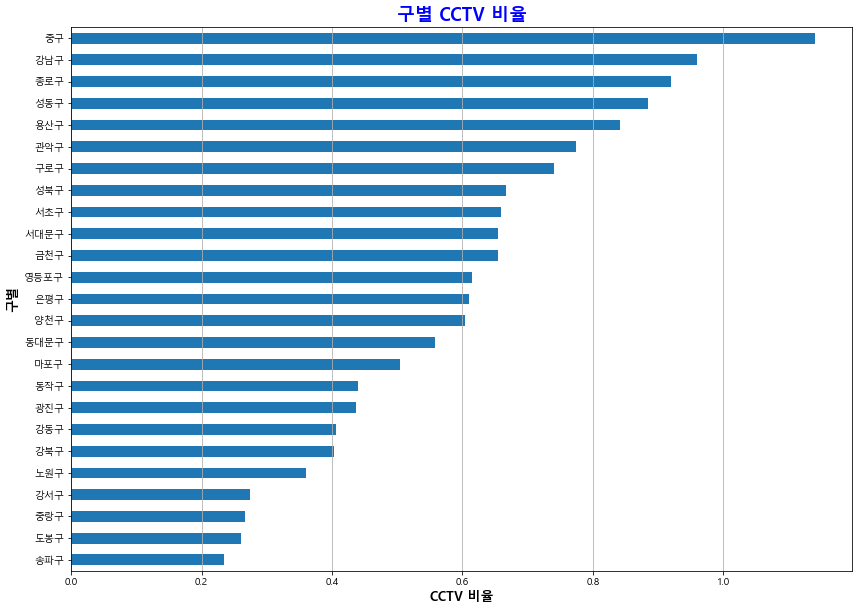

In [133]:
plt.figure(figsize=(14, 10))
df['cctv비율'].sort_values().plot(kind='barh')
plt.grid(axis='x')
plt.xlabel('CCTV 비율', fontdict=label_font)
plt.ylabel('구별', fontdict=label_font)
plt.title('구별 CCTV 비율', fontdict=title_font)
plt.show()

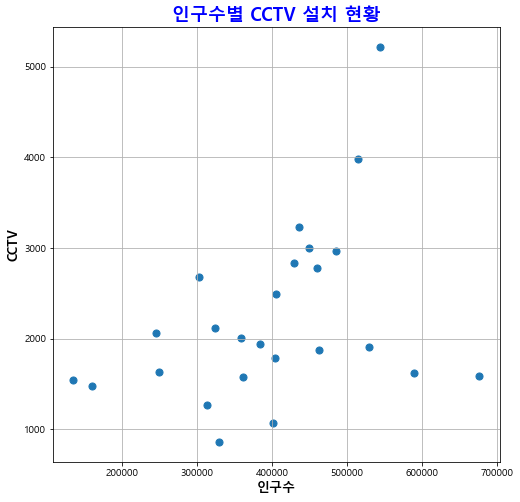

In [134]:
plt.figure(figsize=(8, 8))
plt.scatter(df['인구수'], df['cctv소계'], s=50)
plt.xlabel('인구수', fontdict=label_font)
plt.ylabel('CCTV', fontdict=label_font)
plt.title('인구수별 CCTV 설치 현황', fontdict=title_font)
plt.grid(); plt.show()

In [135]:
fp1 = np.polyfit(df['인구수'], df['cctv소계'], 1)
fp1

array([2.89293854e-03, 1.06798227e+03])

In [136]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

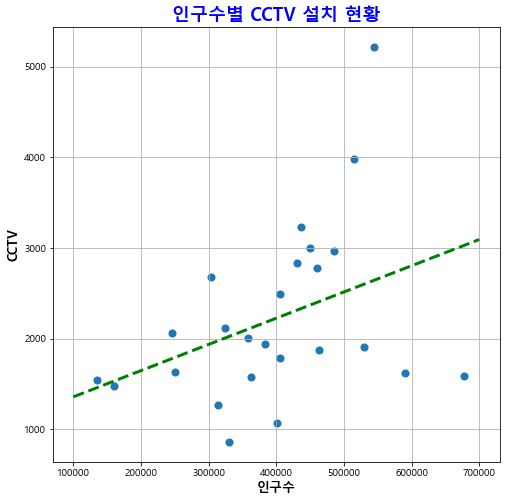

In [137]:
plt.figure(figsize=(8, 8))
plt.scatter(df['인구수'], df['cctv소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수', fontdict=label_font)
plt.ylabel('CCTV', fontdict=label_font)
plt.title('인구수별 CCTV 설치 현황', fontdict=title_font)
plt.grid(); plt.show()

In [138]:
fp1 = np.polyfit(df['인구수'], df['cctv소계'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

df['오차'] = np.abs(df['cctv소계'] - f1(df['인구수']))

df_sort = df.sort_values(by='오차', ascending=False)
df_sort.head()

,cctv소계,cctv최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
송파구,1586,62.833676,676673,670331,6342,92149,0.937233,13.617951,0.234382,1439.555667
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743
도봉구,858,66.601942,329300,327248,2052,61388,0.623140,18.641968,0.260553,1162.626928
중랑구,1068,22.477064,400989,395997,4992,68658,1.244922,17.122165,0.266341,1160.018799


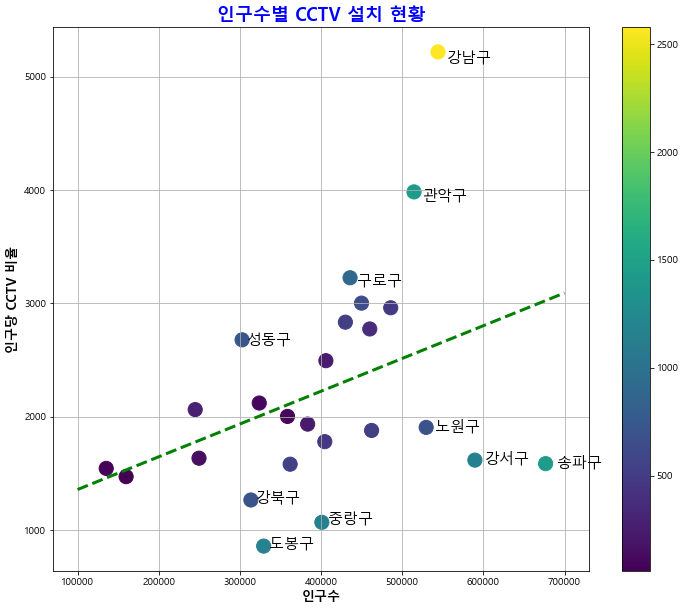

In [139]:
plt.figure(figsize=(12, 10))
plt.scatter(df['인구수'], df['cctv소계'], c=df['오차'], s=200)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n] * 1.02, df_sort['cctv소계'][n] * 0.98, df_sort.index[n], fontsize=15)

plt.xlabel('인구수', fontdict=label_font)
plt.ylabel('인구당 CCTV 비율', fontdict=label_font)
plt.title('인구수별 CCTV 설치 현황', fontdict=title_font)
plt.colorbar(); plt.grid(); plt.show()